<a href="https://colab.research.google.com/github/BautistaDavid/DavidBautista_Blog/blob/main/blog/python_fundamentals/descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python Class To Get Descriptive Statistics 


<p><span style="font-family: Helvetica;"> I'm going to create a python class that allows us to reference an object and that its attributes are information related to the main descriptive statistics of a sample of n observations. This is an easy exercise to identify how the logic of classes, objects, functions and attributes works in python. </span></p>

<p><span style="font-family: Helvetica;">First of all it is important to identify the formulas of all the descriptive statistics that we are going to build in code using python. It is also important to say that <span style="color: rgb(220, 25, 27);"> the main idea of this exercise is not to use any pre-existing Python modules.</span></span></p>

#### What Are We Going To Calculate? 

<p><span style="font-family: Helvetica;">Let's compute the following basic descriptive statistics: the mean, standard deviation, variance, median, kurtosis, skewness, and coefficient of variation. The formulas for those descriptive statistics are as follows:</span></p>

**Mean:**

$$\bar{x} = \frac{\sum_{i=1}^{n} x_{i}}{n}$$

**Standard Deviation:**

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_{i} - \bar{x})^2}{n-1}}$$

**Variance:**

$$\sigma^2 = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})^2}{n-1}$$

**Kurtosis:**

$$k = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})^4}{n *\sigma^4}$$

**Skewness:**

$$k = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})^3}{n *\sigma^3}$$

**Coefficient of Variation:**

$$Cv = \frac{\sigma}{|\bar{x}|}$$


<p><span style="font-family: Helvetica;">Now that we have the formulas of what we want to calculate, we simply have to set up the class and start creating methods for each statistic, even though we could also generate them as attributes of the object.</span></p>

In [2]:
class statistics:
  
  def __init__(self,lst):
    self.lst = lst
    return None

  def mean(self): 
    return sum(self.lst) / len(self.lst)
  
  def stand_dev(self):
    return (sum([(i - self.mean())**2 for i in self.lst]) / (len(self.lst)-1))**0.5  

  def variance(self):
    return self.stand_dev()**2

  def median(self):
    return (sorted(self.lst)[len(self.lst)//2] if len(self.lst)%2 != 0 
            else (sorted(self.lst)[len(self.lst)//2-1]+sorted(self.lst)[len(self.lst)//2]) / 2)
  
  def kurtosis(self):
    return  sum([(i - self.mean())**4 for i in self.lst]) / (len(self.lst)*self.stand_dev()**4)

  def Skewness(self):
    return  sum([(i -self.mean())**3 for i in self.lst]) / (len(self.lst)*self.stand_dev()**3)
  
  def coeff_variation(self):
    return self.stand_dev() / abs(self.mean())

#### Let's Test The Class


<p><span style="font-family: Helvetica;">That's it, our class has different methods that allow the object to calculate each statistic, let's try it!. To test our class we are going to generate a normal distribution using numpy, which has approximately mean 10, standard deviation 2.5 and with n equal to 100</span></p>

In [3]:
import numpy as np
# Let's create the array
lst = np.random.normal(10,2.5,1000)

my_object = statistics(lst) # Nos let's create the object and use the methods

print(f'Mean = {my_object.mean()}')
print(f'Standard Deviation = {my_object.stand_dev()}')
print(f'Variance = {my_object.variance()}')
print(f'Median = {my_object.median()}')
print(f'Kurtosis = {my_object.kurtosis()}')
print(f'Skewness = {my_object.Skewness()}')
print(f'Coefficient of Variation = {my_object.coeff_variation()}')

Mean = 9.84839801580673
Standard Deviation = 2.4873929027592085
Variance = 6.1871234526968815
Median = 9.82499174323263
Kurtosis = 3.036025098172652
Skewness = 0.08013498159870823
Coefficient of Variation = 0.25256827544611116


<p><span style="font-family: Helvetica;">Now that we know some descriptive statistics of this sample we can additionally visualize a BoxPlot of the sample</span></p>

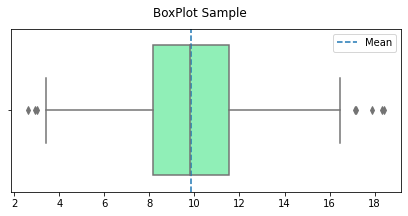

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,3))
plt.suptitle('BoxPlot Sample')
sns.boxplot(x=lst,palette='rainbow')
plt.axvline(my_object.mean(),label='Mean',linestyle='--')
plt.legend()
plt.show()


#### Methods or Attributes... 

<p><span style="font-family: Helvetica;">Now we are going to build the same class but we change things a bit... The idea now is that each descriptive statistic is configured as an attribute of the object and not as a method</span></p>

In [31]:
class statistics:
  
  def __init__(self,lst):
    self.lst = lst
    # Let's create more attributes 
    self.mean = sum(self.lst) / len(self.lst)
    self.stand_dev = (sum([(i - self.mean)**2 for i in self.lst]) / (len(self.lst)-1))**0.5  
    self.variance = self.stand_dev**2
    self.median = (sorted(self.lst)[len(self.lst)//2] if len(self.lst)%2 != 0 
            else (sorted(self.lst)[len(self.lst)//2-1]+sorted(self.lst)[len(self.lst)//2]) / 2)
    self.kurtosis = sum([(i - self.mean)**4 for i in self.lst]) / (len(self.lst)*self.stand_dev**4)
    self.skewness = sum([(i -self.mean)**3 for i in self.lst]) / (len(self.lst)*self.stand_dev**3) 
    self.coeff_variation = self.stand_dev / abs(self.mean)

  # Now let's create a summarize method 
  def summarize(self):
    print(f'Mean = {self.mean}')
    print(f'Standard Deviation = {self.stand_dev}')
    print(f'Variance = {self.variance}')
    print(f'Median = {self.median}')
    print(f'Kurtosis = {self.kurtosis}')
    print(f'Skewness = {self.skewness}')
    print(f'Coefficient of Variation = {self.coeff_variation}')
  



In [33]:
my_object = statistics(lst)
my_object.summarize()

Mean = 9.84839801580673
Standard Deviation = 2.4873929027592085
Variance = 6.1871234526968815
Median = 9.82499174323263
Kurtosis = 3.036025098172652
Skewness = 0.08013498159870823
Coefficient of Variation = 0.25256827544611116
